### 1. Imports

In [5]:
import pandas as pd
import numpy as np

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [7]:
NUM_ROWS = 500
NUM_EPOCHS = 1000

### 2. Load data

In [8]:
df = pd.read_excel(
    '../../data/trv/TRV_Identia.xlsx'
)

In [9]:
df.head()

,ISC.FPacientes.IDUsuario,ISC.FPacientes.etiquetaDiagnosticaExpTLP,ED_2Clases,ISC.FPacientes.etiquetaDiagnostica,ED_MMSE_2Clases,ISC.FPacientes.genero,ISC.FPacientes.Edad,ISC.resultadosCovid.numDosis,ISC.resultadosCovid.numVecesCovid,ISC.resultadosCovid.numVecesCovid_mode,ISC.resultadosCovid.pasadoCovid,ISC.resultadosCovid.sentimientoAislado,ISC.resultadosCovid.sentimientoAislado_mediaFiltro,ISC.resultadosCovid.sentimientoAislado_mode,ISC.resultadosCovid.sintomaCansancio,ISC.resultadosCovid.sintomaDiarrea,ISC.resultadosCovid.sintomaDifRespirar,ISC.resultadosCovid.sintomaDolCabeza,ISC.resultadosCovid.sintomaDolGarganta,ISC.resultadosCovid.sintomaDolMuscular,ISC.resultadosCovid.sintomaEscalofrios,ISC.resultadosCovid.sintomaFiebre,ISC.resultadosCovid.sintomaOtro,ISC.resultadosCovid.sintomaOtroString,ISC.resultadosCovid.sintomaPerGusto,ISC.resultadosCovid.sintomaPerOlfato,ISC.resultadosCovid.vacunado,ISC.resultadosCribaje.Total.PD,ISC.resultadosObservacion.alcohol,ISC.resultadosObservacion.ansiedad,ISC.resultadosObservacion.añosSinFumar,ISC.resultadosObservacion.añosSinFumar_Rangos,ISC.resultadosObservacion.consumoAlcohol_UBEsemanal,ISC.resultadosObservacion.consumoAlcohol_UBEsemanal_knn,ISC.resultadosObservacion.depresion,ISC.resultadosObservacion.enfermedadesAltTiroides,ISC.resultadosObservacion.enfermedadesAntecedentesCardiacos,ISC.resultadosObservacion.enfermedadesCardiopatiaIsquemica,ISC.resultadosObservacion.enfermedadesDiabetes,ISC.resultadosObservacion.enfermedadesHepatica,ISC.resultadosObservacion.enfermedadesHipercolesterolemia,ISC.resultadosObservacion.enfermedadesHipertension,ISC.resultadosObservacion.enfermedadesNinguna,ISC.resultadosObservacion.enfermedadesOtros,ISC.resultadosObservacion.enfermedadesOtrosString,ISC.resultadosObservacion.enfermedadesRenal,ISC.resultadosObservacion.entorno,ISC.resultadosObservacion.familiaresAlzheimer,ISC.resultadosObservacion.familiaresOtraDemencia,ISC.resultadosObservacion.fumador,ISC.resultadosObservacion.numCigarros,ISC.resultadosObservacion.numCigarrosDia_knn,ISC.resultadosObservacion.numCigarrosDia_mode&rangoEdad,ISC.resultadosObservacion.tratCronico,ISC.resultadosObservacion.tratPsicologic,ISC.resultadosObservacion.tratPsiquiatrico,ISC.resultadosOtros.frecOlvidos,ISC.resultadosOtros.frecUsoEmail,ISC.resultadosOtros.frecUsoMovil,ISC.resultadosOtros.frecUsoOrdenador,ISC.resultadosOtros.frecUsoRSociales,ISC.resultadosOtros.frecUsoTele,ISC.resultadosOtros.nivelActFisica,ISC.resultadosOtros.nivelSociabilidad,ISC.resultadosReservaCognitiva.Total.PD,ISC.resultadosReservaCognitiva.actividadLectora,ISC.resultadosReservaCognitiva.cursos,ISC.resultadosReservaCognitiva.escolaridad,ISC.resultadosReservaCognitiva.escolaridadPadres,ISC.resultadosReservaCognitiva.formacionMusical,ISC.resultadosReservaCognitiva.idiomas,ISC.resultadosReservaCognitiva.juegos,ISC.resultadosReservaCognitiva.ocupacion,ISC.resultadosWFQ.DE_array,ISC.resultadosWFQ.DE_total.PD,ISC.resultadosWFQ.NO_array,ISC.resultadosWFQ.NO_total.PD,ISC.resultadosWFQ.SA_array,ISC.resultadosWFQ.SA_total.PD,TRV.LeidenNT.CaminosRuta_total.PD,TRV.LeidenNT.CaminosTopgrafico_total.PD,TRV.LeidenNT.Orden_total.PD,TRV.LeidenNT.PuntoReferencia_total.PD,TRV.LeidenNT.UbicacionAlocentrica_total.PD,TRV.LeidenNT.UbicacionEgocentrico_total.PD,TRV.Stroop.color.PD,TRV.Stroop.color.PDC,TRV.Stroop.interferencia.PD,TRV.Stroop.palabras.PD,TRV.Stroop.palabras.PDC,TRV.Stroop.palabrasColor.PD,TRV.Stroop.palabrasColor.PDC,TRV.Tavec.00_RI-A1.PD,TRV.Tavec.01_RI-A5.PD,TRV.Tavec.02_RI-AT.PD,TRV.Tavec.03_RI-B.PD,TRV.Tavec.04_Rg-Pr.PD,TRV.Tavec.05_Rg-Md.PD,TRV.Tavec.06_Rg-Rc.PD,TRV.Tavec.07_RL-CP.PD,TRV.Tavec.08_RCl-CP.PD,TRV.Tavec.09_RL-LP.PD,TRV.Tavec.10_RCl-LP.PD,TRV.Tavec.11_ESem-RI-A.PD,TRV.Tavec.12_ESem-RI-B.PD,TRV.Tavec.13_ESem-RL-CP.PD,TRV.Tavec.14_ESem-RL-LP.PD,TRV.Tavec.15_ESer-RI-A.PD,TRV.Tavec.16_ESer-RI-B.PD,TRV.Tavec.17_ESer-RL-CP.PD,TRV.Tavec.18_ESer-RL-LP.PD,TRV.Tavec.19_P.PD,TRV.Tavec.20_I-RL.PD,TRV.Tavec.21_I-RCL.PD,TRV.Tavec.22_Recon-Ac.PD,TRV.Tavec

### 3. Preprocesing

In [10]:
VARS = ["ISC.FPacientes.IDUsuario",
"ISC.FPacientes.etiquetaDiagnosticaExpTLP",
"ED_2Clases",
"ISC.FPacientes.etiquetaDiagnostica",
"ED_MMSE_2Clases",
"ISC.FPacientes.genero",
"ISC.FPacientes.Edad",
"ISC.resultadosCovid.numDosis",
"ISC.resultadosCovid.numVecesCovid",
"ISC.resultadosCovid.numVecesCovid_mode",
"ISC.resultadosCovid.pasadoCovid",
"ISC.resultadosCovid.sentimientoAislado",
"ISC.resultadosCovid.sentimientoAislado_mediaFiltro",
"ISC.resultadosCovid.sentimientoAislado_mode",
"ISC.resultadosCovid.sintomaCansancio",
"ISC.resultadosCovid.sintomaDiarrea",
"ISC.resultadosCovid.sintomaDifRespirar",
"ISC.resultadosCovid.sintomaDolCabeza",
"ISC.resultadosCovid.sintomaDolGarganta",
"ISC.resultadosCovid.sintomaDolMuscular",
"ISC.resultadosCovid.sintomaEscalofrios",
"ISC.resultadosCovid.sintomaFiebre",
"ISC.resultadosCovid.sintomaOtro",
"ISC.resultadosCovid.sintomaOtroString",
"ISC.resultadosCovid.sintomaPerGusto",
"ISC.resultadosCovid.sintomaPerOlfato",
"ISC.resultadosCovid.vacunado",
"ISC.resultadosCribaje.Total.PD",
"ISC.resultadosObservacion.alcohol",
"ISC.resultadosObservacion.ansiedad",
"ISC.resultadosObservacion.añosSinFumar",
"ISC.resultadosObservacion.añosSinFumar_Rangos",
"ISC.resultadosObservacion.consumoAlcohol_UBEsemanal",
"ISC.resultadosObservacion.consumoAlcohol_UBEsemanal_knn",
"ISC.resultadosObservacion.depresion",
"ISC.resultadosObservacion.enfermedadesAltTiroides",
"ISC.resultadosObservacion.enfermedadesAntecedentesCardiacos",
"ISC.resultadosObservacion.enfermedadesCardiopatiaIsquemica",
"ISC.resultadosObservacion.enfermedadesDiabetes",
"ISC.resultadosObservacion.enfermedadesHepatica",
"ISC.resultadosObservacion.enfermedadesHipercolesterolemia",
"ISC.resultadosObservacion.enfermedadesHipertension",
"ISC.resultadosObservacion.enfermedadesNinguna",
"ISC.resultadosObservacion.enfermedadesOtros",
"ISC.resultadosObservacion.enfermedadesOtrosString",
"ISC.resultadosObservacion.enfermedadesRenal",
"ISC.resultadosObservacion.entorno",
"ISC.resultadosObservacion.familiaresAlzheimer",
"ISC.resultadosObservacion.familiaresOtraDemencia",
"ISC.resultadosObservacion.fumador",
"ISC.resultadosObservacion.numCigarros",
"ISC.resultadosObservacion.numCigarrosDia_knn",
"ISC.resultadosObservacion.numCigarrosDia_mode&rangoEdad",
"ISC.resultadosObservacion.tratCronico",
"ISC.resultadosObservacion.tratPsicologic",
"ISC.resultadosObservacion.tratPsiquiatrico",
"ISC.resultadosOtros.frecOlvidos",
"ISC.resultadosOtros.frecUsoEmail",
"ISC.resultadosOtros.frecUsoMovil",
"ISC.resultadosOtros.frecUsoOrdenador",
"ISC.resultadosOtros.frecUsoRSociales",
"ISC.resultadosOtros.frecUsoTele",
"ISC.resultadosOtros.nivelActFisica",
"ISC.resultadosOtros.nivelSociabilidad",
"ISC.resultadosReservaCognitiva.Total.PD",
"ISC.resultadosReservaCognitiva.actividadLectora",
"ISC.resultadosReservaCognitiva.cursos",
"ISC.resultadosReservaCognitiva.escolaridad",
"ISC.resultadosReservaCognitiva.escolaridadPadres",
"ISC.resultadosReservaCognitiva.formacionMusical",
"ISC.resultadosReservaCognitiva.idiomas",
"ISC.resultadosReservaCognitiva.juegos",
"ISC.resultadosReservaCognitiva.ocupacion",
"ISC.resultadosWFQ.DE_array",
"ISC.resultadosWFQ.DE_total.PD",
"ISC.resultadosWFQ.NO_array",
"ISC.resultadosWFQ.NO_total.PD",
"ISC.resultadosWFQ.SA_array",
"ISC.resultadosWFQ.SA_total.PD",
"TRV.LeidenNT.CaminosRuta_total.PD",
"TRV.LeidenNT.CaminosTopgrafico_total.PD",
"TRV.LeidenNT.Orden_total.PD",
"TRV.LeidenNT.PuntoReferencia_total.PD",
"TRV.LeidenNT.UbicacionAlocentrica_total.PD",
"TRV.LeidenNT.UbicacionEgocentrico_total.PD",
"TRV.Stroop.color.PD",
"TRV.Stroop.color.PDC",
"TRV.Stroop.interferencia.PD",
"TRV.Stroop.palabras.PD",
"TRV.Stroop.palabras.PDC",
"TRV.Stroop.palabrasColor.PD",
"TRV.Stroop.palabrasColor.PDC",
"TRV.Tavec.00_RI-A1.PD",
"TRV.Tavec.01_RI-A5.PD",
"TRV.Tavec.02_RI-AT.PD",
"TRV.Tavec.03_RI-B.PD",
"TRV.Tavec.04_Rg-Pr.PD",
"TRV.Tavec.05_Rg-Md.PD",
"TRV.Tavec.06_Rg-Rc.PD",
"TRV.Tavec.07_RL-CP.PD",
"TRV.Tavec.08_RCl-CP.PD",
"TRV.Tavec.09_RL-LP.PD",
"TRV.Tavec.10_RCl-LP.PD",
"TRV.Tavec.11_ESem-RI-A.PD",
"TRV.Tavec.12_ESem-RI-B.PD",
"TRV.Tavec.13_ESem-RL-CP.PD",
"TRV.Tavec.14_ESem-RL-LP.PD",
"TRV.Tavec.15_ESer-RI-A.PD",
"TRV.Tavec.16_ESer-RI-B.PD",
"TRV.Tavec.17_ESer-RL-CP.PD",
"TRV.Tavec.18_ESer-RL-LP.PD",
"TRV.Tavec.19_P.PD",
"TRV.Tavec.20_I-RL.PD",
"TRV.Tavec.21_I-RCL.PD",
"TRV.Tavec.22_Recon-Ac.PD",
"TRV.Tavec.23_FP.PD",
"TRV.Tavec.24_Discriminabilidad.PD",
"TRV.Tavec.25_Sesgo.PD",
"TRV.Tavec.26_RI-B_frente_RI-A1.PD",
"TRV.Tavec.27_RL-CP_frente_RI-A5.PD",
"TRV.Tavec.28_RCl-Cp_frente_RCl-LP.PD",
"TRV.Tavec.29_RL-LP_frente_RL-CP.PD",
"TRV.Tavec.30_RCl-LP_frente_RL-LP.PD",
"TRV.Tavec.31_Recon-Ac_frente_RL-LP.PD",
"TRV.Tavec.32_Recon-Ac_frente_RCl-LP.PD"
]

VARS = [
'ISC.resultadosReservaCognitiva.Total.PD',
'ISC.resultadosReservaCognitiva.escolaridad',
'ISC.resultadosObservacion.enfermedadesDiabetes',
'ISC.resultadosObservacion.alcohol',
'TRV.LeidenNT.UbicacionAlocentrica_total.PD',
'TRV.LeidenNT.PuntoReferencia_total.PD',
'TRV.LeidenNT.CaminosTopgrafico_total.PD',
'TRV.Stroop.palabras.PD',
'TRV.Stroop.color.PD',
#'TRV.Stroop.palabras.PDC',
'TRV.Tavec.12_ESem-RI-B.PD',
'TRV.Tavec.10_RCl-LP.PD',
'TRV.Tavec.05_Rg-Md.PD',
'ISC.FPacientes.genero',
'TRV.Tavec.20_I-RL.PD',
'TRV.Tavec.17_ESer-RL-CP.PD',
'TRV.Tavec.14_ESem-RL-LP.PD',
'TRV.Tavec.24_Discriminabilidad.PD']

CLASS = 'ED_2Clases'

drop_columns = []
for v in df.columns:
    if not v in VARS+[CLASS]:
        drop_columns.append(v)

In [11]:
drop_columns

['ISC.FPacientes.IDUsuario',
 'ISC.FPacientes.etiquetaDiagnosticaExpTLP',
 'ISC.FPacientes.etiquetaDiagnostica',
 'ED_MMSE_2Clases',
 'ISC.FPacientes.Edad',
 'ISC.resultadosCovid.numDosis',
 'ISC.resultadosCovid.numVecesCovid',
 'ISC.resultadosCovid.numVecesCovid_mode',
 'ISC.resultadosCovid.pasadoCovid',
 'ISC.resultadosCovid.sentimientoAislado',
 'ISC.resultadosCovid.sentimientoAislado_mediaFiltro',
 'ISC.resultadosCovid.sentimientoAislado_mode',
 'ISC.resultadosCovid.sintomaCansancio',
 'ISC.resultadosCovid.sintomaDiarrea',
 'ISC.resultadosCovid.sintomaDifRespirar',
 'ISC.resultadosCovid.sintomaDolCabeza',
 'ISC.resultadosCovid.sintomaDolGarganta',
 'ISC.resultadosCovid.sintomaDolMuscular',
 'ISC.resultadosCovid.sintomaEscalofrios',
 'ISC.resultadosCovid.sintomaFiebre',
 'ISC.resultadosCovid.sintomaOtro',
 'ISC.resultadosCovid.sintomaOtroString',
 'ISC.resultadosCovid.sintomaPerGusto',
 'ISC.resultadosCovid.sintomaPerOlfato',
 'ISC.resultadosCovid.vacunado',
 'ISC.resultadosCribaje.

In [12]:
df.drop(columns=drop_columns, inplace=True)

In [13]:
df.replace([np.inf, -np.inf], 0, inplace=True)

In [16]:
categorical_columns = [
    'ED_2Clases'
]

In [17]:
df[categorical_columns] = df[categorical_columns].astype('object')

In [18]:
df.dtypes

ED_2Clases                                         object
ISC.FPacientes.genero                               int64
ISC.resultadosObservacion.alcohol                    bool
ISC.resultadosObservacion.enfermedadesDiabetes       bool
ISC.resultadosReservaCognitiva.Total.PD             int64
ISC.resultadosReservaCognitiva.escolaridad          int64
TRV.LeidenNT.CaminosTopgrafico_total.PD             int64
TRV.LeidenNT.PuntoReferencia_total.PD               int64
TRV.LeidenNT.UbicacionAlocentrica_total.PD          int64
TRV.Stroop.color.PD                                 int64
TRV.Stroop.palabras.PD                              int64
TRV.Tavec.05_Rg-Md.PD                             float64
TRV.Tavec.10_RCl-LP.PD                              int64
TRV.Tavec.12_ESem-RI-B.PD                           int64
TRV.Tavec.14_ESem-RL-LP.PD                          int64
TRV.Tavec.17_ESer-RL-CP.PD                          int64
TRV.Tavec.20_I-RL.PD                                int64
TRV.Tavec.24_D

In [16]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(data=df, table_name='TRV')

Auto detected data:



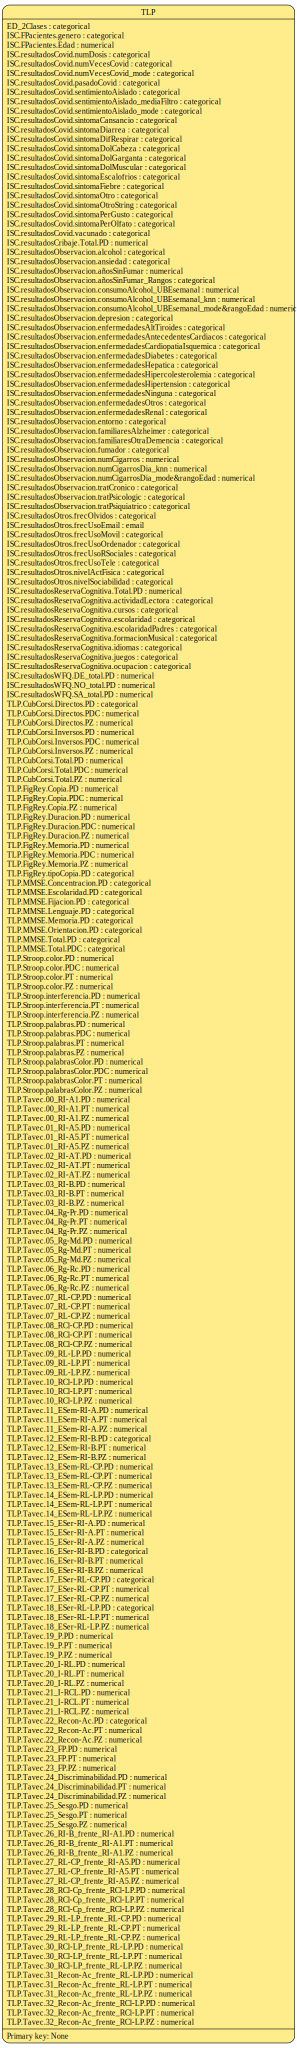

In [17]:
print('Auto detected data:\n')
metadata.visualize()

In [19]:
metadata.validate()

In [20]:
metadata.validate_table(data=df, table_name='TRV')

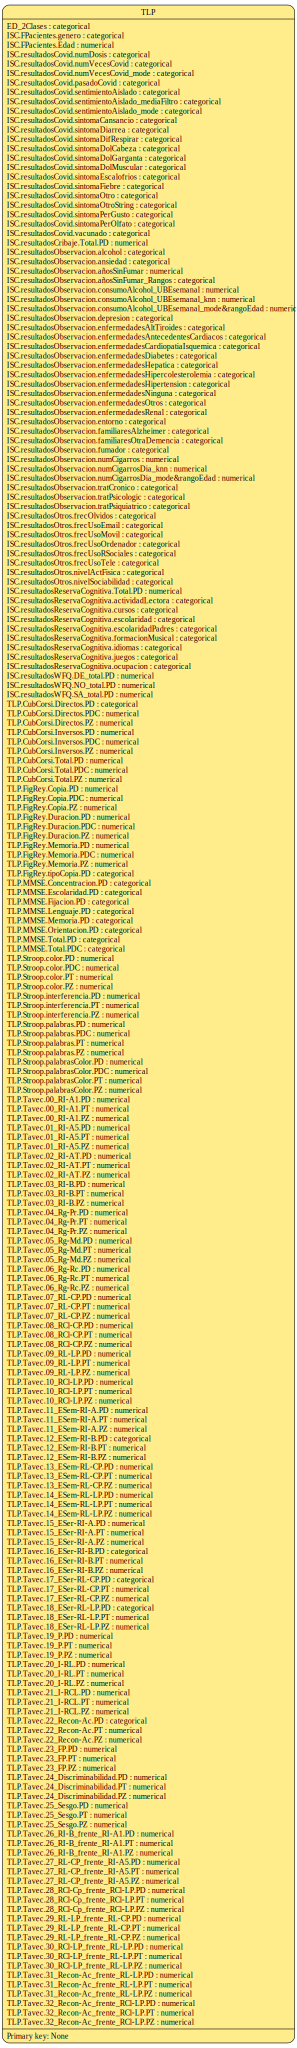

In [21]:
metadata.visualize()

In [22]:
import os
if os.path.exists("metadata.json"):
  os.remove("metadata.json")

metadata.save_to_json('metadata.json')

### 4. Synthesizers

#### 4.1. GaussianCopulaSynthesizer

In [23]:
from sdv.single_table import GaussianCopulaSynthesizer

gc_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    enforce_min_max_values=False,
    enforce_rounding=True,
    locales=["es_ES"],
    numerical_distributions={},
    default_distribution='beta'
)

In [24]:
gc_synthesizer.auto_assign_transformers(df)

In [25]:
processed_df = gc_synthesizer.preprocess(df)

In [26]:
gc_synthesizer.fit_processed_data(processed_df)

In [27]:
df['ED_2Clases'].value_counts()

ED_2Clases
D    235
H     74
Name: count, dtype: int64

In [28]:
num_d, num_h = df['ED_2Clases'].value_counts()
num_synthetic_data = num_d - num_h

In [29]:
synthetic_data_list = list()
while len(synthetic_data_list) < num_synthetic_data:
    samples = gc_synthesizer.sample(num_rows=NUM_ROWS)
    for sample in samples[samples['ED_2Clases'] == 'H'].values:
        synthetic_data_list.append(sample.tolist())
        if len(synthetic_data_list) == num_synthetic_data:
            break

In [30]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [31]:
gc_synthetic_data = pd.concat([df, synthetic_data_df], ignore_index=True)

In [32]:
gc_synthetic_data.shape

(470, 213)

In [33]:
gc_synthetic_data.to_csv(
    '../../data/trv/synthetic-gc.csv',
    index=False
)

#### 4.2.CTGANSynthesizer

In [34]:
from sdv.single_table import CTGANSynthesizer

ctgan_synthesizer = CTGANSynthesizer(
    metadata,
    enforce_min_max_values=False,
    enforce_rounding=True,
    locales=['es_ES'],
    epochs=NUM_EPOCHS,
    verbose=True,
    cuda=True
)

In [35]:
ctgan_synthesizer.auto_assign_transformers(df)

In [36]:
processed_df = ctgan_synthesizer.preprocess(df)

PerformanceAlert: Using the CTGANSynthesizer on this data is not recommended. To model this data, CTGAN will generate a large number of columns.

Original Column Name                                               Est # of Columns (CTGAN)
ED_2Clases                                                         2
ISC.FPacientes.genero                                              2
ISC.FPacientes.Edad                                                11
ISC.resultadosCovid.numDosis                                       6
ISC.resultadosCovid.numVecesCovid                                  5
ISC.resultadosCovid.numVecesCovid_mode                             4
ISC.resultadosCovid.pasadoCovid                                    2
ISC.resultadosCovid.sentimientoAislado                             6
ISC.resultadosCovid.sentimientoAislado_mediaFiltro                 5
ISC.resultadosCovid.sentimientoAislado_mode                        5
ISC.resultadosCovid.sintomaCansancio                               2
IS

In [37]:
ctgan_synthesizer.fit_processed_data(processed_df)

Gen. (-4.92) | Discrim. (-1.15): 100%|██████████| 1000/1000 [05:41<00:00,  2.93it/s]


In [38]:
synthetic_data_list = list()
while len(synthetic_data_list) < num_synthetic_data:
    samples = ctgan_synthesizer.sample(num_rows=NUM_ROWS)
    for sample in samples[samples['ED_2Clases'] == 'H'].values:
        synthetic_data_list.append(sample.tolist())
        if len(synthetic_data_list) == num_synthetic_data:
            break

In [39]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [40]:
ctgan_synthetic_data = pd.concat([df, synthetic_data_df], ignore_index=True)

In [41]:
ctgan_synthetic_data.shape

(470, 213)

In [42]:
ctgan_synthetic_data.to_csv(
    '../../data/trv/synthetic-ctgan.csv',
    index=False
)

#### 4.3. TVAESynthesizer

In [43]:
from sdv.single_table import TVAESynthesizer

tvaes_synthesizer = TVAESynthesizer(
    metadata,
    enforce_min_max_values=False,
    enforce_rounding=True,
    epochs=NUM_EPOCHS,
    verbose=True,
    cuda=True
)

In [44]:
tvaes_synthesizer.auto_assign_transformers(df)

In [45]:
processed_df = tvaes_synthesizer.preprocess(df)

In [46]:
tvaes_synthesizer.fit_processed_data(processed_df)

Loss: -282.760: 100%|██████████| 1000/1000 [02:46<00:00,  6.00it/s]


In [47]:
synthetic_data_list = list()
while len(synthetic_data_list) < num_synthetic_data:
    samples = tvaes_synthesizer.sample(num_rows=NUM_ROWS)
    for sample in samples[samples['ED_2Clases'] == 'H'].values:
        synthetic_data_list.append(sample.tolist())
        if len(synthetic_data_list) == num_synthetic_data:
            break

In [48]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [49]:
tvaes_synthetic_data = pd.concat([df, synthetic_data_df], ignore_index=True)

In [50]:
tvaes_synthetic_data.shape

(470, 213)

In [51]:
tvaes_synthetic_data.to_csv(
    '../../data/trv/synthetic-tvaes.csv',
    index=False
)

### 5. Evaluating Real vs. Synthetic Data

#### 5.1. GaussianCopulaSynthesizer

In [52]:
from sdv.evaluation.single_table import run_diagnostic

gc_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=gc_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 213/213 [00:00<00:00, 2448.38it/s]|
Data Validity Score: 98.81%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<?, ?it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.41%



In [53]:
from sdv.evaluation.single_table import evaluate_quality

gc_quality_report = evaluate_quality(
    df,
    gc_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 213/213 [00:00<00:00, 1163.64it/s]|
Column Shapes Score: 92.56%

(2/2) Evaluating Column Pair Trends: |██████████| 22578/22578 [01:30<00:00, 248.45it/s]|
Column Pair Trends Score: 90.69%

Overall Score (Average): 91.62%



In [54]:
# gc_details = gc_quality_report.get_details('Column Pair Trends')
# gc_details[gc_details['Real Correlation'].notnull()]

In [55]:
#gc_quality_report.get_details('Column Shapes')

In [56]:
# from sdv.evaluation.single_table import get_column_plot

# plot_columns = list(df.columns)
# for column in plot_columns:
#     fig = get_column_plot(
#         real_data=df,
#         synthetic_data=gc_synthetic_data,
#         column_name=column,
#         metadata=metadata
#     )
#     fig.show()

#### 5.2. CTGANSynthesizer

In [57]:
ctgan_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=ctgan_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 213/213 [00:00<00:00, 2468.77it/s]|
Data Validity Score: 98.29%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 248.01it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.14%



In [58]:
ctgan_quality_report = evaluate_quality(
    df,
    ctgan_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 213/213 [00:00<00:00, 1520.21it/s]|
Column Shapes Score: 93.23%

(2/2) Evaluating Column Pair Trends: |██████████| 22578/22578 [01:33<00:00, 240.92it/s]|
Column Pair Trends Score: 83.57%

Overall Score (Average): 88.4%



In [59]:
# ctgan_details = ctgan_quality_report.get_details('Column Pair Trends')
# ctgan_details[ctgan_details['Real Correlation'].notnull()]

In [60]:
# ctgan_quality_report.get_details('Column Shapes')

In [61]:
# for column in plot_columns:
#     fig = get_column_plot(
#         real_data=df,
#         synthetic_data=ctgan_synthetic_data,
#         column_name=column,
#         metadata=metadata
#     )
#     fig.show()

#### 5.3. TVAESSynthesizer

In [62]:
tvaes_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=tvaes_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 213/213 [00:00<00:00, 2259.26it/s]|
Data Validity Score: 99.64%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<?, ?it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.82%



In [63]:
tvaes_quality_report = evaluate_quality(
    df,
    tvaes_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 213/213 [00:00<00:00, 900.67it/s]|
Column Shapes Score: 93.05%

(2/2) Evaluating Column Pair Trends: |██████████| 22578/22578 [01:29<00:00, 253.35it/s]|
Column Pair Trends Score: 92.19%

Overall Score (Average): 92.62%



In [64]:
# tvaes_details = tvaes_quality_report.get_details('Column Pair Trends')
# tvaes_details[tvaes_details['Real Correlation'].notnull()]

In [65]:
# tvaes_quality_report.get_details('Column Shapes')

In [66]:
# for column in plot_columns:
#     fig = get_column_plot(
#         real_data=df,
#         synthetic_data=tvaes_synthetic_data,
#         column_name=column,
#         metadata=metadata
#     )
#     fig.show()